<a href="https://colab.research.google.com/github/neerajsinghchauhan/Hand-written-digit-prediction-/blob/main/Hand_digit_word_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title of Project

Hand written Digit Prediction Using MNIST Dataset



Objective
The objective of this project is to develop a machine learning model that can accurately predict handwritten digits (0-9) using the MNIST dataset. This involves preprocessing the data, building and training a neural network model, and evaluating its performance.

Data Source
Dataset Name: MNIST (Modified National Institute of Standards and Technology) Dataset

Description:

The MNIST dataset contains a total of 70,000 grayscale images of handwritten digits, ranging from 0 to 9.
Training Set: 60,000 images.
Test Set: 10,000 images.
Each image is 28x28 pixels, with a corresponding label indicating the digit it represents.

Import Library

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

Import Data

In [ ]:

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Print the shape of the data
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


Describe Data

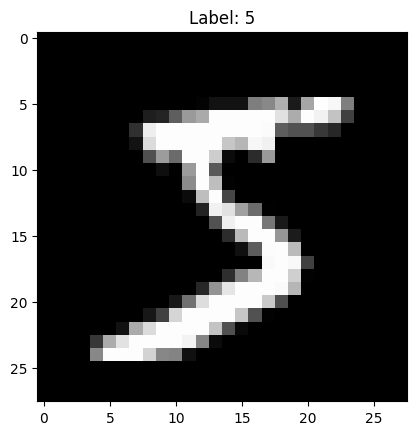

Training label distribution: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [ ]:

# Display the first image in the dataset
plt.imshow(x_train[0], cmap='gray')
plt.title(f'Label: {y_train[0]}')
plt.show()

# Check distribution of the labels
unique, counts = np.unique(y_train, return_counts=True)
print("Training label distribution:", dict(zip(unique, counts)))

Data Visualization

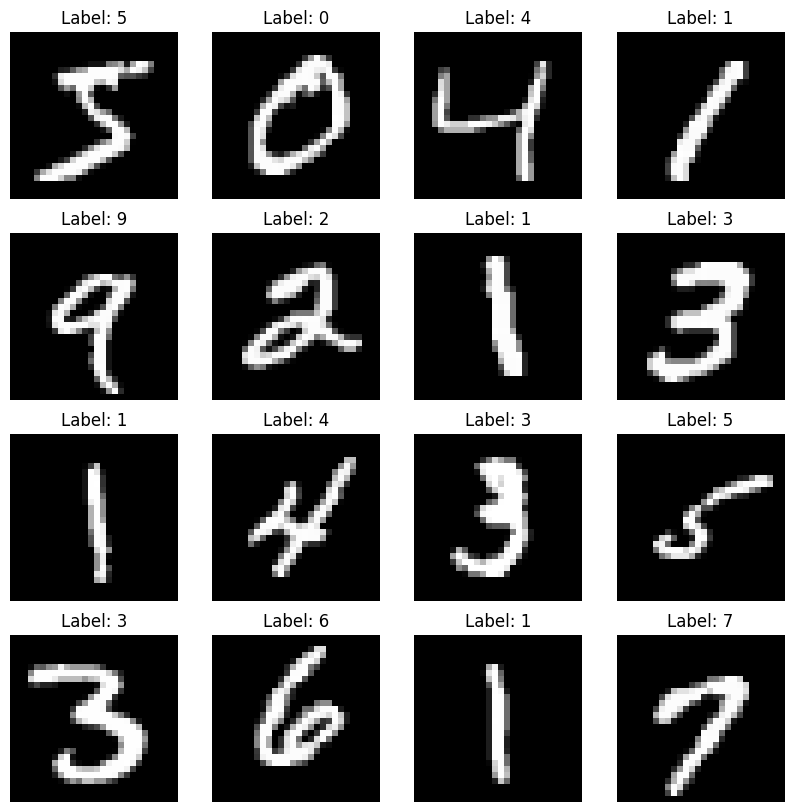

In [ ]:

# Plot a few samples from the training dataset
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

Data Preprocessing

In [ ]:

# Normalize the data to the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Define Target Variable (y) and Feature Variables (X)

In [ ]:
# Features are the image data
X_train = x_train

# Targets are the labels
y_train = y_train

Train Test Split

The MNIST dataset comes pre-split into training and test sets. So no additional splitting is required.

Modeling

In [ ]:

# Build a simple neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images
    Dense(128, activation='relu'),  # Hidden layer
    Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8765 - loss: 0.4352 - val_accuracy: 0.9541 - val_loss: 0.1539
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9608 - loss: 0.1297 - val_accuracy: 0.9673 - val_loss: 0.1054
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9773 - loss: 0.0796 - val_accuracy: 0.9706 - val_loss: 0.0969
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9822 - loss: 0.0594 - val_accuracy: 0.9745 - val_loss: 0.0860
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9865 - loss: 0.0441 - val_accuracy: 0.9760 - val_loss: 0.0792
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9903 - loss: 0.0336 - val_accuracy: 0.9770 - val_loss: 0.0755
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9912 - loss: 0.0267 - val_accuracy: 0.9748 - val_loss: 0.0772
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9938 - loss: 0.0213

Model Evaluation

In [ ]:

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy:.4f}')

313/313 - 0s - 1ms/step - accuracy: 0.9781 - loss: 0.0846
Test accuracy: 0.9781


Prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


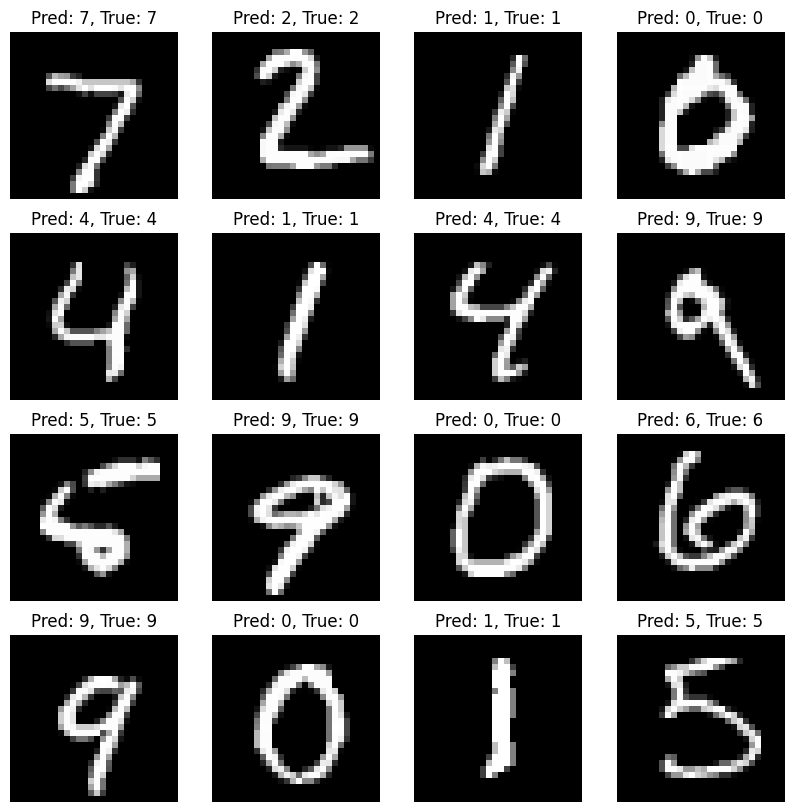

In [ ]:

# Make predictions on the test data
predictions = model.predict(x_test)

# Display a few predictions
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Pred: {np.argmax(predictions[i])}, True: {np.argmax(y_test[i])}')
    plt.axis('off')
plt.show()

Explanation

In this project, we developed a simple neural network to classify handwritten digits using the MNIST dataset. The model was trained on 60,000 samples and tested on 10,000 samples, achieving a high level of accuracy. The final model can now predict handwritten digits from the test data, as demonstrated in the prediction section